In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Clean the dataset

In [2]:
data = pd.read_csv("/kaggle/input/turkishtvseries/CleanData.csv")
data.drop_duplicates(subset=['Name'],inplace=True)
data.set_index('Name',inplace=True)

In [3]:
data

,Genre,Date,Actors,Season,Episode,Rating,ProductionCompany,Directors,Writers,Runtime,IsFinished
Name,,,,,,,,,,,
As the Crow Flies,Drama,2022–,"Birce Akalay, Miray Daner, Ibrahim Celikkol, I...",2,16,6.3,Ay Yapim,"Deniz Yorulmazer, Koray Kerimoglu",Meriç Acemi,45,0
Persona,"Crime, Drama, Mystery",2018–,"Haluk Bilginer, Sebnem Bozoklu, Recep Usta, Ca...",2,20,9.0,Ay Yapim,Onur Saylak,Hakan Gunday,60,0
The Family,"Action, Crime, Drama",2023–,"Kivanç Tatlitug, Serenay Sarikaya, Nur Sürer, ...",2,25,6.6,"Ay Yapim, Show TV","Ahmet Katiksiz, Gökçen Usta","Hakan Bonomo, Adilcan Güresçi",137,0
Wild Heart,"Drama, Romance",2023–,"Halit Özgür Sari, Simay Barlas, Yurdaer Okur, ...",1,16,7.3,NTC Medya,Çagatay Tosun,"Serap Gazel, Çisem Katilmaz",144,0
Love Is in the Air,"Comedy, Romance",2020–2021,"Hande Erçel, Kerem Bürsin, Evrim Dogan, Anil I...",2,52,7.3,MF Yapim,"Altan Dönmez, Ender Mihlar","Ayse Kutlu, Erdem Açikgöz",120,1
...,...,...,...,...,...,...,...,...,...,...,...
Büyümüs de Küçülmüs,"Comedy, Fantasy",2003,"Sevinç Aktansel, Kerem Altaylar, Ömür Arpaci, ...",1,20,2.2,ANS,Levent Demirkale,"Caglar Cetin-Ayse, Saygin Delibas",61,1
Kara Günes,Drama,2007,"Senay Akay, Caner Cindoruk, Demet Sasmaz, Gani...",1,20,2.2,ANS,Levent Demirkale,"Caglar Cetin-Ayse, Saygin Delibas",61,1
Ask Eski Bir Yalan,"Comedy, Romance",2007,"Hülya Koçyigit, Salih Kalyon, Ali Il, Burçin O...",1,1,5.7,ANS,Feride Kaytan,Itir Esen,61,1


In [4]:
movies = data[data['Genre'].notna()]
movies = data[data['Date'].notna()]

In [5]:
movies

,Genre,Date,Actors,Season,Episode,Rating,ProductionCompany,Directors,Writers,Runtime,IsFinished
Name,,,,,,,,,,,
As the Crow Flies,Drama,2022–,"Birce Akalay, Miray Daner, Ibrahim Celikkol, I...",2,16,6.3,Ay Yapim,"Deniz Yorulmazer, Koray Kerimoglu",Meriç Acemi,45,0
Persona,"Crime, Drama, Mystery",2018–,"Haluk Bilginer, Sebnem Bozoklu, Recep Usta, Ca...",2,20,9.0,Ay Yapim,Onur Saylak,Hakan Gunday,60,0
The Family,"Action, Crime, Drama",2023–,"Kivanç Tatlitug, Serenay Sarikaya, Nur Sürer, ...",2,25,6.6,"Ay Yapim, Show TV","Ahmet Katiksiz, Gökçen Usta","Hakan Bonomo, Adilcan Güresçi",137,0
Wild Heart,"Drama, Romance",2023–,"Halit Özgür Sari, Simay Barlas, Yurdaer Okur, ...",1,16,7.3,NTC Medya,Çagatay Tosun,"Serap Gazel, Çisem Katilmaz",144,0
Love Is in the Air,"Comedy, Romance",2020–2021,"Hande Erçel, Kerem Bürsin, Evrim Dogan, Anil I...",2,52,7.3,MF Yapim,"Altan Dönmez, Ender Mihlar","Ayse Kutlu, Erdem Açikgöz",120,1
...,...,...,...,...,...,...,...,...,...,...,...
Büyümüs de Küçülmüs,"Comedy, Fantasy",2003,"Sevinç Aktansel, Kerem Altaylar, Ömür Arpaci, ...",1,20,2.2,ANS,Levent Demirkale,"Caglar Cetin-Ayse, Saygin Delibas",61,1
Kara Günes,Drama,2007,"Senay Akay, Caner Cindoruk, Demet Sasmaz, Gani...",1,20,2.2,ANS,Levent Demirkale,"Caglar Cetin-Ayse, Saygin Delibas",61,1
Ask Eski Bir Yalan,"Comedy, Romance",2007,"Hülya Koçyigit, Salih Kalyon, Ali Il, Burçin O...",1,1,5.7,ANS,Feride Kaytan,Itir Esen,61,1


# Feature: Genres

In [6]:

df_genres_added = pd.Series(movies['Genre'])


df_genres_added = df_genres_added.apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


df_genres_added = df_genres_added.str.get_dummies(', ')


df_added_genres_dummies = pd.concat([movies, df_genres_added], axis=1)

df_added_genres_dummies = df_added_genres_dummies.drop('Genre', axis=1)


In [7]:
df_added_genres_dummies=df_added_genres_dummies.drop("none",axis=1)

In [8]:
df_added_genres_dummies

,Date,Actors,Season,Episode,Rating,ProductionCompany,Directors,Writers,Runtime,IsFinished,...,Drama,Family,Fantasy,History,Horror,Mystery,Romance,Sci-Fi,Thriller,War
Name,,,,,,,,,,,,,,,,,,,,,
As the Crow Flies,2022–,"Birce Akalay, Miray Daner, Ibrahim Celikkol, I...",2,16,6.3,Ay Yapim,"Deniz Yorulmazer, Koray Kerimoglu",Meriç Acemi,45,0,...,1,0,0,0,0,0,0,0,0,0
Persona,2018–,"Haluk Bilginer, Sebnem Bozoklu, Recep Usta, Ca...",2,20,9.0,Ay Yapim,Onur Saylak,Hakan Gunday,60,0,...,1,0,0,0,0,1,0,0,0,0
The Family,2023–,"Kivanç Tatlitug, Serenay Sarikaya, Nur Sürer, ...",2,25,6.6,"Ay Yapim, Show TV","Ahmet Katiksiz, Gökçen Usta","Hakan Bonomo, Adilcan Güresçi",137,0,...,1,0,0,0,0,0,0,0,0,0
Wild Heart,2023–,"Halit Özgür Sari, Simay Barlas, Yurdaer Okur, ...",1,16,7.3,NTC Medya,Çagatay Tosun,"Serap Gazel, Çisem Katilmaz",144,0,...,1,0,0,0,0,0,1,0,0,0
Love Is in the Air,2020–2021,"Hande Erçel, Kerem Bürsin, Evrim Dogan, Anil I...",2,52,7.3,MF Yapim,"Altan Dönmez, Ender Mihlar","Ayse Kutlu, Erdem Açikgöz",120,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Büyümüs de Küçülmüs,2003,"Sevinç Aktansel, Kerem Altaylar, Ömür Arpaci, ...",1,20,2.2,ANS,Levent Demirkale,"Caglar Cetin-Ayse, Saygin Delibas",61,1,...,0,0,1,0,0,0,0,0,0,0
Kara Günes,2007,"Senay Akay, Caner Cindoruk, Demet Sasmaz, Gani...",1,20,2.2,ANS,Levent Demirkale,"Caglar Cetin-Ayse, Saygin Delibas",61,1,...,1,0,0,0,0,0,0,0,0,0
Ask Eski Bir Yalan,2007,"Hülya Koçyigit, Salih Kalyon, Ali Il, Burçin O...",1,1,5.7,ANS,Feride Kaytan,Itir Esen,61,1,...,0,0,0,0,0,0,1,0,0,0


# Feature: Director

In [9]:
def list(directors):
    if "," in directors:
        return [name.strip() for name in directors.split(",")]
    else:
        return [directors]


def remove_paren(directors):
    dir_list = []
    for director in directors:
        if "(" in director:
            dir_clean = director.split("(")[0].strip()
            dir_list.append(dir_clean)
        else:
            dir_list.append(director)
    return dir_list

In [10]:
movies['Directors'] = movies['Directors'].apply(lambda x: list(x))
movies['Directors'] = movies['Directors'].apply(lambda x: remove_paren(x))

In [11]:
movies['Directors']

Name
 As the Crow Flies      [Deniz Yorulmazer, Koray Kerimoglu]
 Persona                                      [Onur Saylak]
 The Family                   [Ahmet Katiksiz, Gökçen Usta]
 Wild Heart                                 [Çagatay Tosun]
 Love Is in the Air            [Altan Dönmez, Ender Mihlar]
                                       ...                 
 Büyümüs de Küçülmüs                     [Levent Demirkale]
 Kara Günes                              [Levent Demirkale]
 Ask Eski Bir Yalan                         [Feride Kaytan]
 Çek Bir Film                                [Sadik Battal]
 Rabia                                      [Gül Güzelkaya]
Name: Directors, Length: 1037, dtype: object

In [12]:
df_dir_exploded = movies.explode('Directors')
dir_10 = df_dir_exploded['Directors'].value_counts()[:20].index.tolist()

def top_directors(directors):
    dir_list = []
    for director in directors:
        if director in dir_10:
            dir_list.append(director)
    return dir_list

movies['topDir'] = movies['Directors'].apply(lambda x: top_directors(x))

dir_df = pd.get_dummies(movies['topDir'].apply(pd.Series).stack()).groupby(level=0).sum()

df_dir_model = pd.concat([df_added_genres_dummies, dir_df], axis=1)

df_dir_model.replace(np.nan, 0, inplace=True)


In [13]:
df_dir_model


,Date,Actors,Season,Episode,Rating,ProductionCompany,Directors,Writers,Runtime,IsFinished,...,Hilal Saral,Metin Balekoglu,Mustafa Sevki Dogan,Onur Tan,Osman Sinav,Sadullah Celen,Senol Sönmez,Serdar Akar,Volkan Kocatürk,Çagatay Tosun
Name,,,,,,,,,,,,,,,,,,,,,
As the Crow Flies,2022–,"Birce Akalay, Miray Daner, Ibrahim Celikkol, I...",2,16,6.3,Ay Yapim,"Deniz Yorulmazer, Koray Kerimoglu",Meriç Acemi,45,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Persona,2018–,"Haluk Bilginer, Sebnem Bozoklu, Recep Usta, Ca...",2,20,9.0,Ay Yapim,Onur Saylak,Hakan Gunday,60,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Family,2023–,"Kivanç Tatlitug, Serenay Sarikaya, Nur Sürer, ...",2,25,6.6,"Ay Yapim, Show TV","Ahmet Katiksiz, Gökçen Usta","Hakan Bonomo, Adilcan Güresçi",137,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wild Heart,2023–,"Halit Özgür Sari, Simay Barlas, Yurdaer Okur, ...",1,16,7.3,NTC Medya,Çagatay Tosun,"Serap Gazel, Çisem Katilmaz",144,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Love Is in the Air,2020–2021,"Hande Erçel, Kerem Bürsin, Evrim Dogan, Anil I...",2,52,7.3,MF Yapim,"Altan Dönmez, Ender Mihlar","Ayse Kutlu, Erdem Açikgöz",120,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Büyümüs de Küçülmüs,2003,"Sevinç Aktansel, Kerem Altaylar, Ömür Arpaci, ...",1,20,2.2,ANS,Levent Demirkale,"Caglar Cetin-Ayse, Saygin Delibas",61,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kara Günes,2007,"Senay Akay, Caner Cindoruk, Demet Sasmaz, Gani...",1,20,2.2,ANS,Levent Demirkale,"Caglar Cetin-Ayse, Saygin Delibas",61,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ask Eski Bir Yalan,2007,"Hülya Koçyigit, Salih Kalyon, Ali Il, Burçin O...",1,1,5.7,ANS,Feride Kaytan,Itir Esen,61,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature: Writers

In [14]:
movies['Writers'] = movies['Writers'].apply(lambda x: list(x))
movies['Writers'] = movies['Writers'].apply(lambda x: remove_paren(x))

In [15]:
writers_exploded = movies.explode('Writers')
writer_10 = writers_exploded['Writers'].value_counts()[:10].index.tolist()

def top_writers(writers):
    writer_list = []
    for writer in writers:
        if writer in writer_10:
            writer_list.append(writer)
    return writer_list

movies['top writers'] = movies['Writers'].apply(lambda x: top_writers(x))

writers_df = pd.get_dummies(movies['top writers'].apply(pd.Series).stack()).groupby(level=0).sum()

writers_model = pd.concat([df_dir_model, writers_df], axis=1)

writers_model.replace(np.nan, 0, inplace=True)

In [16]:
writers_df

,Deniz Akcay Katiksiz,Eylem Canpolat,Gökhan Horzum,Ilker Arslan,Mahinur Ergun,Melis Civelek,Meriç Acemi,Pinar Bulut,Sergin Akyaz,Tayfun Güneyer
Name,,,,,,,,,,
20 Dakika,0,0,0,0,0,0,0,1,0,0
A Miracle,0,0,0,0,0,0,0,2,0,0
Acil Ask Araniyor,0,0,1,0,0,0,0,0,0,0
Adanali,0,0,0,0,0,0,0,0,0,1
Adini Feriha Koydum,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
Zalim,0,0,0,0,0,0,0,0,0,1
Zeliha'nin Gözleri,0,0,0,0,0,0,1,0,0,0
Zümrüt,0,0,0,0,0,0,0,0,1,0


In [17]:
writers_model

,Date,Actors,Season,Episode,Rating,ProductionCompany,Directors,Writers,Runtime,IsFinished,...,Deniz Akcay Katiksiz,Eylem Canpolat,Gökhan Horzum,Ilker Arslan,Mahinur Ergun,Melis Civelek,Meriç Acemi,Pinar Bulut,Sergin Akyaz,Tayfun Güneyer
Name,,,,,,,,,,,,,,,,,,,,,
As the Crow Flies,2022–,"Birce Akalay, Miray Daner, Ibrahim Celikkol, I...",2,16,6.3,Ay Yapim,"Deniz Yorulmazer, Koray Kerimoglu",Meriç Acemi,45,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Persona,2018–,"Haluk Bilginer, Sebnem Bozoklu, Recep Usta, Ca...",2,20,9.0,Ay Yapim,Onur Saylak,Hakan Gunday,60,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Family,2023–,"Kivanç Tatlitug, Serenay Sarikaya, Nur Sürer, ...",2,25,6.6,"Ay Yapim, Show TV","Ahmet Katiksiz, Gökçen Usta","Hakan Bonomo, Adilcan Güresçi",137,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wild Heart,2023–,"Halit Özgür Sari, Simay Barlas, Yurdaer Okur, ...",1,16,7.3,NTC Medya,Çagatay Tosun,"Serap Gazel, Çisem Katilmaz",144,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Love Is in the Air,2020–2021,"Hande Erçel, Kerem Bürsin, Evrim Dogan, Anil I...",2,52,7.3,MF Yapim,"Altan Dönmez, Ender Mihlar","Ayse Kutlu, Erdem Açikgöz",120,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Büyümüs de Küçülmüs,2003,"Sevinç Aktansel, Kerem Altaylar, Ömür Arpaci, ...",1,20,2.2,ANS,Levent Demirkale,"Caglar Cetin-Ayse, Saygin Delibas",61,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kara Günes,2007,"Senay Akay, Caner Cindoruk, Demet Sasmaz, Gani...",1,20,2.2,ANS,Levent Demirkale,"Caglar Cetin-Ayse, Saygin Delibas",61,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ask Eski Bir Yalan,2007,"Hülya Koçyigit, Salih Kalyon, Ali Il, Burçin O...",1,1,5.7,ANS,Feride Kaytan,Itir Esen,61,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature: Stars

In [18]:
movies['Actors'] = movies['Actors'].apply(lambda x: list(x))
movies['Actors'] = movies['Actors'].apply(lambda x: remove_paren(x))

In [19]:
actors_exploded = movies.explode('Actors')
# Let's do something similar to director
actors_30 =actors_exploded['Actors'].value_counts()[:30].index.tolist()

def top_stars(stars):
    star_list = []
    for star in stars:
        if star in actors_30:
            star_list.append(star)
    return star_list

movies['top actors'] = movies['Actors'].apply(lambda x: top_stars(x))

actors_df = pd.get_dummies(movies['top actors'].apply(pd.Series).stack()).groupby(level=0).sum()

actors_model = pd.concat([writers_model, actors_df[actors_30]], axis=1)

actors_model.replace(np.nan,0,inplace=True)



In [20]:
actors_model

,Date,Actors,Season,Episode,Rating,ProductionCompany,Directors,Writers,Runtime,IsFinished,...,Melisa Sözen,Seçkin Özdemir,Burak Deniz,Murat Han,Begüm Birgören,Çetin Tekindor,Gökçe Bahadir,Ugur Polat,Hatice Aslan,Mert Firat
Name,,,,,,,,,,,,,,,,,,,,,
As the Crow Flies,2022–,"Birce Akalay, Miray Daner, Ibrahim Celikkol, I...",2,16,6.3,Ay Yapim,"Deniz Yorulmazer, Koray Kerimoglu",Meriç Acemi,45,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Persona,2018–,"Haluk Bilginer, Sebnem Bozoklu, Recep Usta, Ca...",2,20,9.0,Ay Yapim,Onur Saylak,Hakan Gunday,60,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Family,2023–,"Kivanç Tatlitug, Serenay Sarikaya, Nur Sürer, ...",2,25,6.6,"Ay Yapim, Show TV","Ahmet Katiksiz, Gökçen Usta","Hakan Bonomo, Adilcan Güresçi",137,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wild Heart,2023–,"Halit Özgür Sari, Simay Barlas, Yurdaer Okur, ...",1,16,7.3,NTC Medya,Çagatay Tosun,"Serap Gazel, Çisem Katilmaz",144,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Love Is in the Air,2020–2021,"Hande Erçel, Kerem Bürsin, Evrim Dogan, Anil I...",2,52,7.3,MF Yapim,"Altan Dönmez, Ender Mihlar","Ayse Kutlu, Erdem Açikgöz",120,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Büyümüs de Küçülmüs,2003,"Sevinç Aktansel, Kerem Altaylar, Ömür Arpaci, ...",1,20,2.2,ANS,Levent Demirkale,"Caglar Cetin-Ayse, Saygin Delibas",61,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kara Günes,2007,"Senay Akay, Caner Cindoruk, Demet Sasmaz, Gani...",1,20,2.2,ANS,Levent Demirkale,"Caglar Cetin-Ayse, Saygin Delibas",61,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ask Eski Bir Yalan,2007,"Hülya Koçyigit, Salih Kalyon, Ali Il, Burçin O...",1,1,5.7,ANS,Feride Kaytan,Itir Esen,61,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature: Production Company


In [21]:
movies['ProductionCompany'] = movies['ProductionCompany'].apply(lambda x: list(x))
movies['ProductionCompany'] = movies['ProductionCompany'].apply(lambda x: remove_paren(x))

In [22]:
prod_exploded = movies.explode('ProductionCompany')
prod_15 = prod_exploded['ProductionCompany'].value_counts()[:15].index.tolist()
movies.loc[movies['ProductionCompany'].isnull(),'ProductionCompany'] = movies.loc[movies['ProductionCompany'].isnull(),'ProductionCompany'].apply(lambda x: [])

def top_prod(comp):
    comp_list = []
    for co in comp:
        if co in prod_15:
            comp_list.append(co)
    return comp_list

movies['top prod co.'] = movies['ProductionCompany'].apply(lambda x: top_prod(x))

prod_df = pd.get_dummies(movies['top prod co.'].apply(pd.Series).stack()).groupby(level=0).sum()

prod_model = pd.concat([actors_model, prod_df[prod_15]], axis=1)

prod_model.replace(np.nan,0,inplace=True)

In [23]:
prod_model=prod_model.drop(["Date", "Actors", "ProductionCompany", "Directors", "Writers"],axis=1)

In [24]:
prod_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037 entries,  As the Crow Flies to  Rabia
Data columns (total 95 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                1037 non-null   int64  
 1   Episode               1037 non-null   int64  
 2   Rating                1037 non-null   float64
 3   Runtime               1037 non-null   int64  
 4   IsFinished            1037 non-null   int64  
 5   Action                1037 non-null   int64  
 6   Adventure             1037 non-null   int64  
 7   Animation             1037 non-null   int64  
 8   Comedy                1037 non-null   int64  
 9   Crime                 1037 non-null   int64  
 10  Drama                 1037 non-null   int64  
 11  Family                1037 non-null   int64  
 12  Fantasy               1037 non-null   int64  
 13  History               1037 non-null   int64  
 14  Horror                1037 non-null   int64  
 15  Mystery

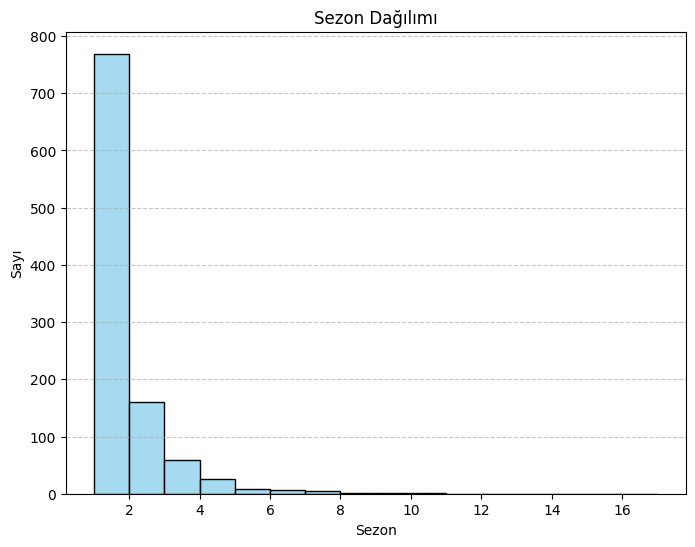

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(prod_model['Season'], bins=range(prod_model['Season'].min(), prod_model['Season'].max()), kde=False, color='skyblue', edgecolor='black')

plt.xlabel('Sezon')
plt.ylabel('Sayı')
plt.title('Sezon Dağılımı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
criteria = [prod_model['Season'].between(0, 3), prod_model['Season'].between(3, 6), prod_model['Season'].between(6, 9),prod_model['Season'].between(9, 20),]
values = [1,2,3,4]  ## 1 başarısız, 2 kısmen başarılı, 3 başarılı, 4 olgun
prod_model['target'] = np.select(criteria, values, 0)

In [27]:
prod_model.head(50)

,Season,Episode,Rating,Runtime,IsFinished,Action,Adventure,Animation,Comedy,Crime,...,MF Yapim,Yagmur Ajans,Limon Film,NTC Medya,Pastel Film,Koliba Film,Sinegraf,BKM,OGM Pictures,target
Name,,,,,,,,,,,,,,,,,,,,,
As the Crow Flies,2,16,6.3,45,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Persona,2,20,9.0,60,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
The Family,2,25,6.6,137,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Wild Heart,1,16,7.3,144,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
Love Is in the Air,2,52,7.3,120,1,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Family Secrets,3,80,8.4,150,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
The Pit,4,132,7.6,120,1,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Golden Boy,2,51,6.2,120,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
The Tailor,3,23,6.2,45,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


# Split Data

In [28]:
finished=prod_model.loc[prod_model["IsFinished"] == 1]

In [29]:
len(finished)

926

In [30]:
not_finished=prod_model.loc[prod_model["IsFinished"] == 0]

In [31]:
len(not_finished)

111

In [32]:
y=finished["Season"]


In [33]:
x_train,x_test,y_train,y_test = train_test_split(finished,finished["Season"], test_size=0.25, random_state=101,stratify=(finished["target"]))

In [34]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


694
232
694
232


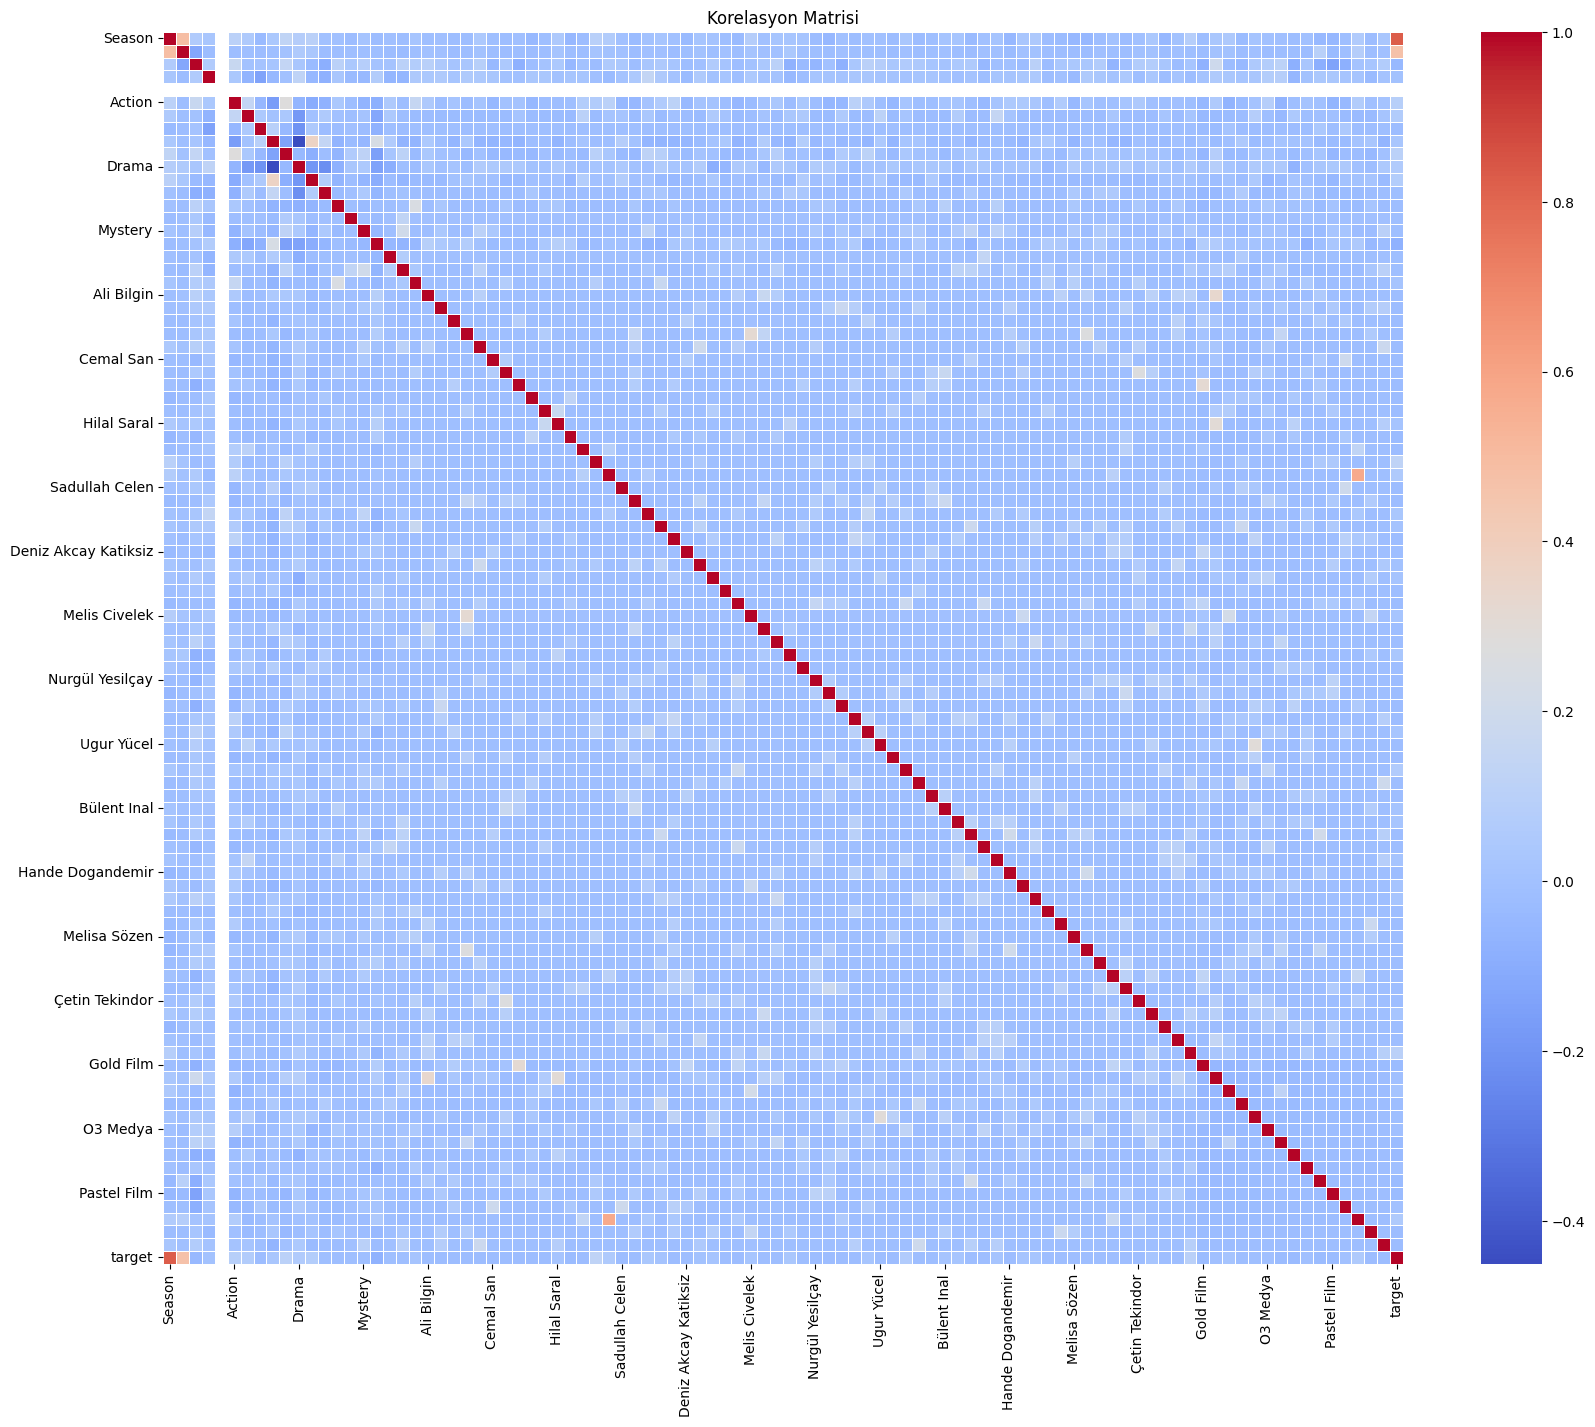

In [35]:
np.random.seed(42)
correlation_matrix = finished.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5, fmt='.2f', annot=False, xticklabels=5, yticklabels=5)
plt.title('Korelasyon Matrisi')
plt.show()

# Models

In [36]:
rf = RandomForestClassifier(n_estimators=1000)
KNN = KNeighborsClassifier(n_neighbors=5,metric="minkowski")
Extra = ExtraTreesClassifier()

## KNN

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [38]:
if not isinstance(y_train, np.ndarray):
    y_train=np.array(y_train)

In [39]:
y_test.unique()

array([ 1,  2,  3,  5,  4, 10,  7])

In [40]:
modelknn=KNN.fit(X_train_scaled,y_train)
knn=KNN.score(X_test_scaled,y_test)
print("KNN",knn*100)

y_pred = modelknn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

KNN 76.29310344827587
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.97      0.87       175
           2       0.55      0.18      0.27        34
           3       0.00      0.00      0.00        13
           4       0.29      0.40      0.33         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.76       232
   macro avg       0.20      0.19      0.18       232
weighted avg       0.69      0.76      0.71       232



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [41]:
X_ongoing_scaled = scaler.transform(not_finished)

knn_predictions = modelknn.predict(X_ongoing_scaled)
knn_list=[]

for i, knn_predictions in enumerate(knn_predictions):
    print(f"{not_finished.index[i]}: Tahmin edilen sezon sayısı = {knn_predictions}")
    knn_list.append(knn_predictions)

 As the Crow Flies: Tahmin edilen sezon sayısı = 1
 Persona: Tahmin edilen sezon sayısı = 1
 The Family: Tahmin edilen sezon sayısı = 1
 Wild Heart: Tahmin edilen sezon sayısı = 1
 Family Secrets: Tahmin edilen sezon sayısı = 1
 Golden Boy: Tahmin edilen sezon sayısı = 2
 Çekiç ve Gül: Bir Behzat Ç: Tahmin edilen sezon sayısı = 1
 Establishment: Osman: Tahmin edilen sezon sayısı = 4
 Cranberry Sorbet: Tahmin edilen sezon sayısı = 1
 Ne Gemiler Yaktim: Tahmin edilen sezon sayısı = 1
 Sandik Kokusu: Tahmin edilen sezon sayısı = 1
 Boundless Love: Tahmin edilen sezon sayısı = 1
 Saladin: The Conquerer of Jerusalem: Tahmin edilen sezon sayısı = 1
 Shahmaran: Tahmin edilen sezon sayısı = 1
 Hide Me: Tahmin edilen sezon sayısı = 1
 Sapphire: Tahmin edilen sezon sayısı = 1
 Runaway: Tahmin edilen sezon sayısı = 1
 Another Self: Tahmin edilen sezon sayısı = 1
 Altin Kafes: Tahmin edilen sezon sayısı = 1
 My Siblings: Tahmin edilen sezon sayısı = 4
 Sahane Hayatim: Tahmin edilen sezon sayısı = 

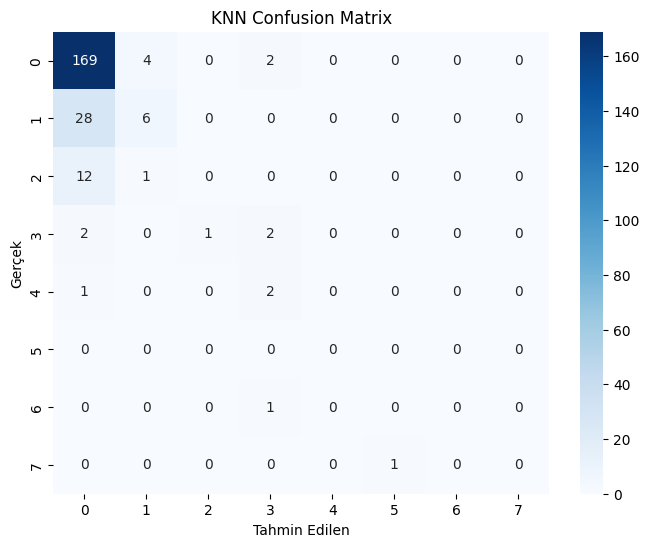

In [42]:
knn_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues")
plt.title('KNN Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# Random Forest

In [43]:
rf_model=rf.fit(x_train, y_train)
RF = rf.score(x_test, y_test)
print(f'Random forest:', RF*100)

y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Random forest: 96.98275862068965
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       175
           2       0.94      1.00      0.97        34
           3       1.00      0.85      0.92        13
           4       0.62      1.00      0.77         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1

    accuracy                           0.97       232
   macro avg       0.40      0.43      0.41       232
weighted avg       0.96      0.97      0.96       232



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [44]:
rf_predictions = rf_model.predict(X_ongoing_scaled)
rf_list=[]


for i, rf_predictions in enumerate(rf_predictions):
    print(f"{not_finished.index[i]}: Tahmin edilen sezon sayısı = {rf_predictions}")
    rf_list.append(rf_predictions)

 As the Crow Flies: Tahmin edilen sezon sayısı = 1
 Persona: Tahmin edilen sezon sayısı = 1
 The Family: Tahmin edilen sezon sayısı = 1
 Wild Heart: Tahmin edilen sezon sayısı = 1
 Family Secrets: Tahmin edilen sezon sayısı = 2
 Golden Boy: Tahmin edilen sezon sayısı = 1
 Çekiç ve Gül: Bir Behzat Ç: Tahmin edilen sezon sayısı = 1
 Establishment: Osman: Tahmin edilen sezon sayısı = 4
 Cranberry Sorbet: Tahmin edilen sezon sayısı = 1
 Ne Gemiler Yaktim: Tahmin edilen sezon sayısı = 1
 Sandik Kokusu: Tahmin edilen sezon sayısı = 1
 Boundless Love: Tahmin edilen sezon sayısı = 1
 Saladin: The Conquerer of Jerusalem: Tahmin edilen sezon sayısı = 1
 Shahmaran: Tahmin edilen sezon sayısı = 1
 Hide Me: Tahmin edilen sezon sayısı = 1
 Sapphire: Tahmin edilen sezon sayısı = 1
 Runaway: Tahmin edilen sezon sayısı = 1
 Another Self: Tahmin edilen sezon sayısı = 1
 Altin Kafes: Tahmin edilen sezon sayısı = 1
 My Siblings: Tahmin edilen sezon sayısı = 4
 Sahane Hayatim: Tahmin edilen sezon sayısı = 

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


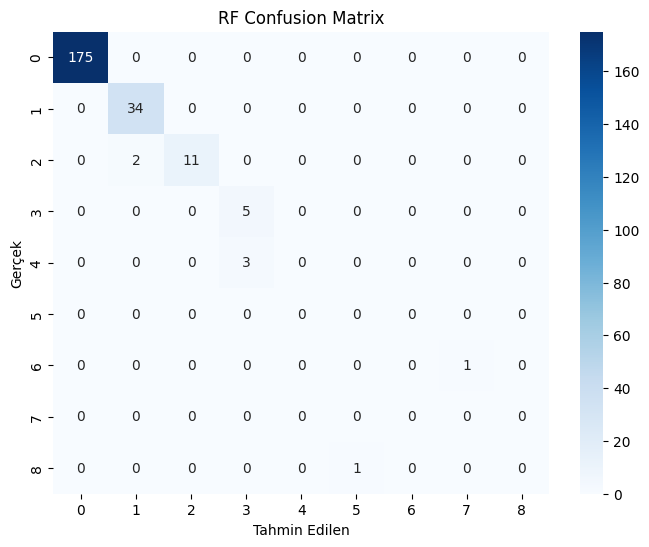

In [45]:
rf_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title('RF Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

## Extratrees

In [46]:
exta_model=Extra.fit(x_train, y_train)
extra = Extra.score(x_test, y_test)
print(f'Extratrees: ',extra*100)

y_pred = exta_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Extratrees:  97.84482758620689
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       175
           2       1.00      0.97      0.99        34
           3       0.93      1.00      0.96        13
           4       0.71      1.00      0.83         5
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1

    accuracy                           0.98       232
   macro avg       0.52      0.48      0.48       232
weighted avg       0.98      0.98      0.98       232



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [47]:
extra_predictions = exta_model.predict(X_ongoing_scaled)
extra_list=[]

for i, extra_predictions in enumerate(extra_predictions):
    print(f"{not_finished.index[i]}: Tahmin edilen sezon sayısı = {extra_predictions}")
    extra_list.append(extra_predictions)

 As the Crow Flies: Tahmin edilen sezon sayısı = 1
 Persona: Tahmin edilen sezon sayısı = 1
 The Family: Tahmin edilen sezon sayısı = 1
 Wild Heart: Tahmin edilen sezon sayısı = 1
 Family Secrets: Tahmin edilen sezon sayısı = 1
 Golden Boy: Tahmin edilen sezon sayısı = 1
 Çekiç ve Gül: Bir Behzat Ç: Tahmin edilen sezon sayısı = 1
 Establishment: Osman: Tahmin edilen sezon sayısı = 4
 Cranberry Sorbet: Tahmin edilen sezon sayısı = 1
 Ne Gemiler Yaktim: Tahmin edilen sezon sayısı = 1
 Sandik Kokusu: Tahmin edilen sezon sayısı = 1
 Boundless Love: Tahmin edilen sezon sayısı = 1
 Saladin: The Conquerer of Jerusalem: Tahmin edilen sezon sayısı = 1
 Shahmaran: Tahmin edilen sezon sayısı = 1
 Hide Me: Tahmin edilen sezon sayısı = 1
 Sapphire: Tahmin edilen sezon sayısı = 1
 Runaway: Tahmin edilen sezon sayısı = 1
 Another Self: Tahmin edilen sezon sayısı = 1
 Altin Kafes: Tahmin edilen sezon sayısı = 1
 My Siblings: Tahmin edilen sezon sayısı = 2
 Sahane Hayatim: Tahmin edilen sezon sayısı = 

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


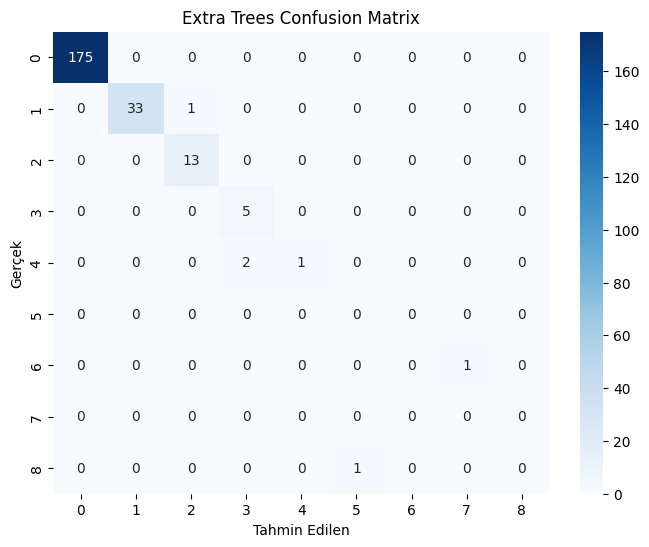

In [48]:
extra_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(extra_cm, annot=True, fmt="d", cmap="Blues")
plt.title('Extra Trees Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

## SVM

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


svm_model = SVC(kernel='linear', C=1.0)  


svm_modell=svm_model.fit(X_train_scaled, y_train)


y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       175
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        13
           4       0.71      1.00      0.83         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1

    accuracy                           0.97       232
   macro avg       0.37      0.40      0.38       232
weighted avg       0.97      0.97      0.97       232



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [50]:
svm_predictions = svm_modell.predict(X_ongoing_scaled)
svm_list=[]
for i, svm_predictions in enumerate(svm_predictions):
    print(f"{not_finished.index[i]}: Tahmin edilen sezon sayısı = {svm_predictions}")
    svm_list.append(svm_predictions)

 As the Crow Flies: Tahmin edilen sezon sayısı = 2
 Persona: Tahmin edilen sezon sayısı = 2
 The Family: Tahmin edilen sezon sayısı = 2
 Wild Heart: Tahmin edilen sezon sayısı = 1
 Family Secrets: Tahmin edilen sezon sayısı = 3
 Golden Boy: Tahmin edilen sezon sayısı = 2
 Çekiç ve Gül: Bir Behzat Ç: Tahmin edilen sezon sayısı = 2
 Establishment: Osman: Tahmin edilen sezon sayısı = 6
 Cranberry Sorbet: Tahmin edilen sezon sayısı = 2
 Ne Gemiler Yaktim: Tahmin edilen sezon sayısı = 1
 Sandik Kokusu: Tahmin edilen sezon sayısı = 1
 Boundless Love: Tahmin edilen sezon sayısı = 1
 Saladin: The Conquerer of Jerusalem: Tahmin edilen sezon sayısı = 1
 Shahmaran: Tahmin edilen sezon sayısı = 1
 Hide Me: Tahmin edilen sezon sayısı = 1
 Sapphire: Tahmin edilen sezon sayısı = 1
 Runaway: Tahmin edilen sezon sayısı = 2
 Another Self: Tahmin edilen sezon sayısı = 1
 Altin Kafes: Tahmin edilen sezon sayısı = 1
 My Siblings: Tahmin edilen sezon sayısı = 4
 Sahane Hayatim: Tahmin edilen sezon sayısı = 

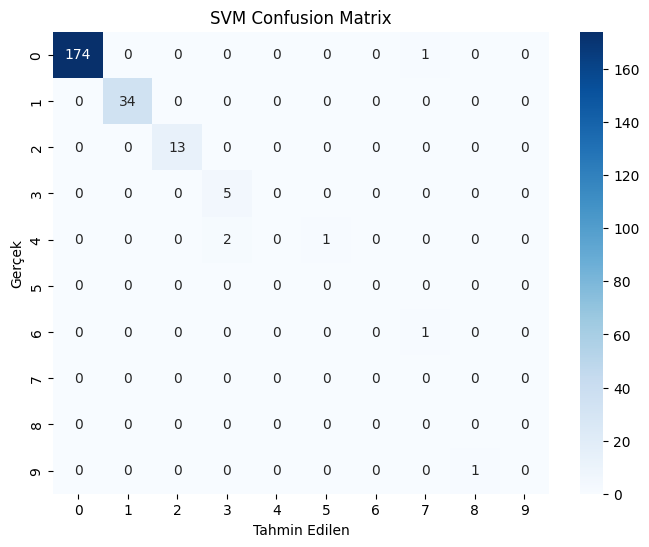

In [51]:
svm_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.title('SVM Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# MLP

In [52]:
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

# MLPClassifier modelini oluştur ve eğit
nn_model = MLPClassifier()
nn_model.fit(x_train_normalized, y_train)

# Test seti üzerinde tahmin yap
nn_predictions = nn_model.predict(x_test_normalized)

# Doğruluk değerini ve sınıflandırma raporunu görüntüle
nn_accuracy = accuracy_score(y_test, nn_predictions)
print("NN Accuracy: ", nn_accuracy)
print("Classification Report:\n", classification_report(y_test, nn_predictions))

NN Accuracy:  0.8146551724137931
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93       175
           2       0.49      0.56      0.52        34
           3       0.44      0.31      0.36        13
           4       0.75      0.60      0.67         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1

    accuracy                           0.81       232
   macro avg       0.29      0.27      0.28       232
weighted avg       0.82      0.81      0.81       232



/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

In [53]:
mlp_predictions = nn_model.predict(X_ongoing_scaled)
mlp_list=[]
for i, mlp_predictions in enumerate(mlp_predictions):
    print(f"{not_finished.index[i]}: Tahmin edilen sezon sayısı = {mlp_predictions}")
    mlp_list.append(mlp_predictions)

 As the Crow Flies: Tahmin edilen sezon sayısı = 2
 Persona: Tahmin edilen sezon sayısı = 2
 The Family: Tahmin edilen sezon sayısı = 2
 Wild Heart: Tahmin edilen sezon sayısı = 1
 Family Secrets: Tahmin edilen sezon sayısı = 2
 Golden Boy: Tahmin edilen sezon sayısı = 2
 Çekiç ve Gül: Bir Behzat Ç: Tahmin edilen sezon sayısı = 1
 Establishment: Osman: Tahmin edilen sezon sayısı = 6
 Cranberry Sorbet: Tahmin edilen sezon sayısı = 3
 Ne Gemiler Yaktim: Tahmin edilen sezon sayısı = 1
 Sandik Kokusu: Tahmin edilen sezon sayısı = 1
 Boundless Love: Tahmin edilen sezon sayısı = 1
 Saladin: The Conquerer of Jerusalem: Tahmin edilen sezon sayısı = 2
 Shahmaran: Tahmin edilen sezon sayısı = 1
 Hide Me: Tahmin edilen sezon sayısı = 1
 Sapphire: Tahmin edilen sezon sayısı = 1
 Runaway: Tahmin edilen sezon sayısı = 1
 Another Self: Tahmin edilen sezon sayısı = 2
 Altin Kafes: Tahmin edilen sezon sayısı = 1
 My Siblings: Tahmin edilen sezon sayısı = 4
 Sahane Hayatim: Tahmin edilen sezon sayısı = 

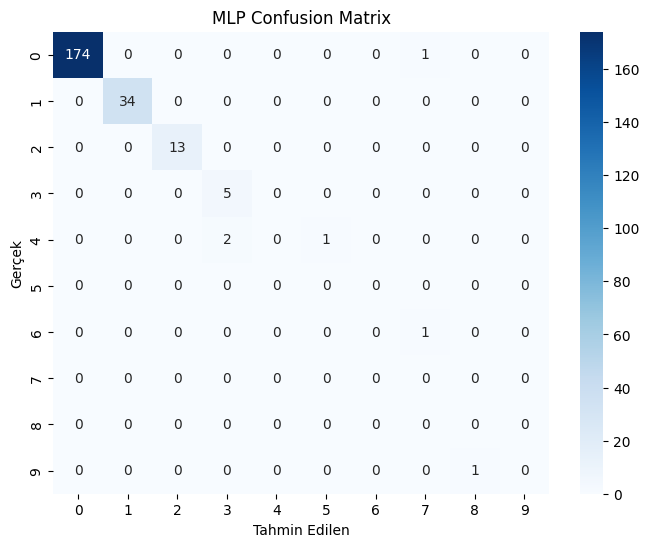

In [54]:
mlp_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(mlp_cm, annot=True, fmt="d", cmap="Blues")
plt.title('MLP Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

In [55]:
result_df = pd.DataFrame({
    'KNN Tahmini': knn_list,
    'SVM Tahmini': svm_list,
    'RF Tahmini': rf_list,
    'MLP Tahmini': mlp_list,
    'Extra Trees': extra_list,
    'Gerçek Sezon': not_finished["Season"]
})


In [56]:
result_df.head(50)

,KNN Tahmini,SVM Tahmini,RF Tahmini,MLP Tahmini,Extra Trees,Gerçek Sezon
Name,,,,,,
As the Crow Flies,1,2,1,2,1,2
Persona,1,2,1,2,1,2
The Family,1,2,1,2,1,2
Wild Heart,1,1,1,1,1,1
Family Secrets,1,3,2,2,1,3
Golden Boy,2,2,1,2,1,2
Çekiç ve Gül: Bir Behzat Ç,1,2,1,1,1,2
Establishment: Osman,4,6,4,6,4,5
Cranberry Sorbet,1,2,1,3,1,2


In [57]:
result_df.tail(50)

,KNN Tahmini,SVM Tahmini,RF Tahmini,MLP Tahmini,Extra Trees,Gerçek Sezon
Name,,,,,,
Serhat,1,1,1,1,1,1
Kizil Goncalar,1,1,1,1,1,1
Asaf,1,1,1,1,1,1
10 Thousand Steps,1,2,1,2,1,2
Ask ve Umut,1,1,1,1,1,1
Mendirman Jaloliddin,1,1,1,1,1,1
Yardimci Oyuncu,1,1,1,1,1,1
Toprak ile Fidan,1,1,1,2,1,1
Gokturkler Asya'nin Efendileri,1,1,1,1,1,1
